In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [9]:
def simulation(time_axis, u, r, epsilon ,n_trials):
    '''
    Input:
    time_axis = time axis
    u = binary vector indicating the presence/absence of one stimulus
    r = vector representing the reward
    epsilon = learning rate
    n_trials = number of trails for training

    Output:
    v = prediction of reward
    delta = temporal difference error
    w = weights
    '''
    # Initializing values
    w = np.zeros((n_trials, len(time_axis)))
    v = np.zeros((n_trials, len(time_axis)))
    delta = np.zeros((n_trials, len(time_axis)))

    for trial in range(n_trials):
        
        if(trial != 0):
            # take weights from previous trial
            w[trial,:] = w[trial-1, :]

        # Compute prediction v
        for t in time_axis:
            v_sum = 0
            for tau in range(t+1):
                v_sum = v_sum + w[trial,tau] * u[t-tau]
            v[trial,t] = v_sum

        for t in time_axis[:-1]:
            if t == 0:
                continue # Skip to next iteration

            # calculate prediction error 
            delta[trial,t] = r[t] + v[trial,t + 1] - v[trial,t]

            # Update weights
            if(delta[trial,t] != 0):
                for tau in range(t + 1):
                    if(delta[trial,t] * u[t - tau] != 0):
                        w[trial,tau] = w[trial,tau] + epsilon * delta[trial,t] * u[t - tau]
        
    return v, delta, w


In [10]:
# Reconstruting the plot in the book
t_start = 0
t_end = 300
t_stimulus = 100
t_reward = 200
#t_reward_2 = 150
t_reward_scale = 10
n_trials = 1000
alpha = 0.2

time_axis = np.arange(t_start, t_end)

time_axis = np.arange(t_start, t_end)
u = np.zeros(len(time_axis))
r = np.zeros(len(time_axis))
u[t_stimulus] = 1
#r[t_reward] = 2
#r[t_reward_2] = 2

# Normal distribution
indices = np.arange(len(time_axis))
r += 2 * np.exp(-0.5 * ((indices - t_reward) / t_reward_scale)**2)

v, delta, w = simulation(time_axis, u, r, alpha, n_trials)

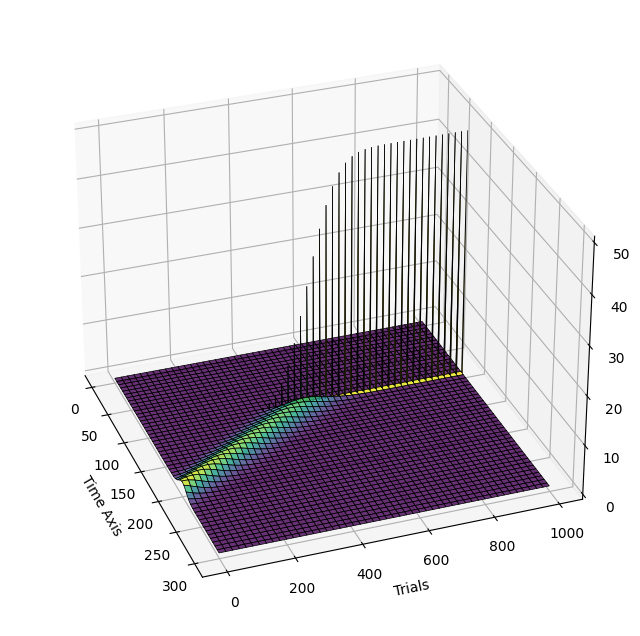

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(time_axis, range(n_trials))

# Use a different colormap for better visibility
surf = ax.plot_surface(X, Y, delta, cmap='viridis', edgecolor='k', linewidth=0.5, alpha=0.8)

# Set labels and title
ax.set_xlabel('Time Axis')
ax.set_ylabel('Trials')
ax.set_zlabel('Delta')

# Add grid lines for better readability
ax.grid(True)
# Rotate the view for better perspective
ax.view_init(30, -20)

plt.savefig('Neural_Mod_RL_plot_1_5.png', dpi=300, bbox_inches='tight')
plt.show()


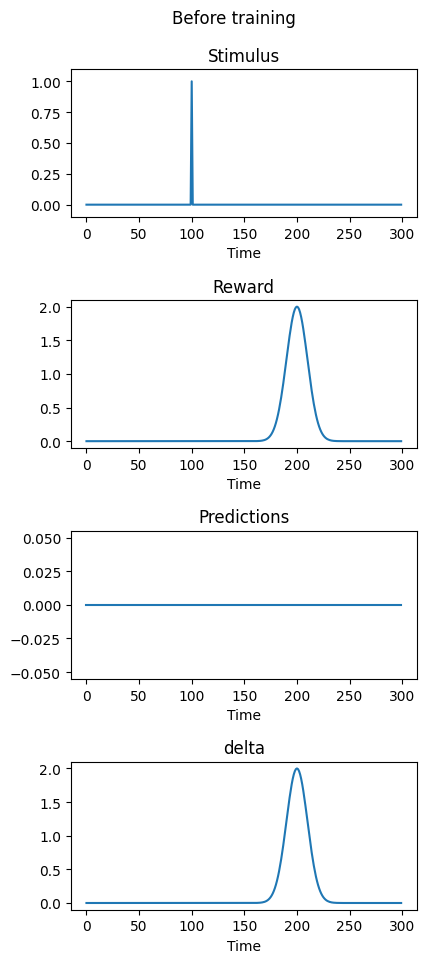

In [12]:
fig, axs = plt.subplots(4, 1, figsize=(5, 10))
# padding between subplots
plt.tight_layout(pad=4.0)
fig.suptitle('Before training')
fig.subplots_adjust(top=0.92)

# seaborn lineplot
g1 = sns.lineplot(x = time_axis, y = u, ax = axs[0])
g1.set(ylim=(-0.1, 1.1), title = 'Stimulus', xlabel = 'Time')
g2 = sns.lineplot(x = time_axis, y = r, ax = axs[1])
g2.set(ylim=(-0.1, 2.1), title = 'Reward', xlabel = 'Time')
g3 = sns.lineplot(x = time_axis, y = v[0,:], ax = axs[2])
g3.set(title = 'Predictions', xlabel = 'Time')
g4 = sns.lineplot(x = time_axis, y = delta[0,:], ax = axs[3])
g4.set(title = 'delta', xlabel = 'Time')

fig.savefig('Neural_Mod_RL_plot_2_5.png', dpi=300, bbox_inches='tight')



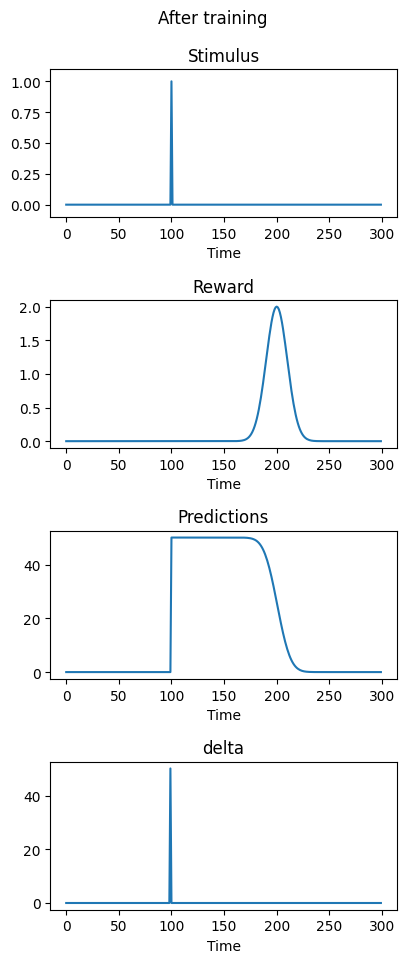

In [13]:
fig, axs = plt.subplots(4, 1, figsize=(5, 10))
# padding between subplots
plt.tight_layout(pad=4.0)
fig.suptitle('After training')
fig.subplots_adjust(top=0.92)

# seaborn lineplot
g1 = sns.lineplot(x = time_axis, y = u, ax = axs[0])
g1.set(ylim=(-0.1, 1.1), title = 'Stimulus', xlabel = 'Time')
g2 = sns.lineplot(x = time_axis, y = r, ax = axs[1])
g2.set(ylim=(-0.1, 2.1), title = 'Reward', xlabel = 'Time')
g3 = sns.lineplot(x = time_axis, y = v[999,:], ax = axs[2])
g3.set(title = 'Predictions', xlabel = 'Time')
g4 = sns.lineplot(x = time_axis, y = delta[999,:], ax = axs[3])
g4.set(title = 'delta', xlabel = 'Time')

fig.savefig('Neural_Mod_RL_plot_3_5.png', dpi=300, bbox_inches='tight')